In [23]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading Dataset
blood = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data', sep=",",engine = 'python')

In [4]:
blood.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
blood.info

<bound method DataFrame.info of      Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
0                   2                 50                  12500   
1                   0                 13                   3250   
2                   1                 16                   4000   
3                   2                 20                   5000   
4                   1                 24                   6000   
..                ...                ...                    ...   
743                23                  2                    500   
744                21                  2                    500   
745                23                  3                    750   
746                39                  1                    250   
747                72                  1                    250   

     Time (months)  whether he/she donated blood in March 2007  
0               98                                           1  
1               28               

In [6]:
blood.shape

(748, 5)

In [7]:
blood.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [8]:
blood.fillna(blood.mean(), inplace=True)

In [9]:
blood.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [11]:
X = blood.drop(columns=['whether he/she donated blood in March 2007']).copy()


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [14]:
from sklearn.cluster import KMeans

In [17]:
kmeans=KMeans(n_clusters=3, random_state=42)
clusters=kmeans.fit_predict(x_scaled)

In [18]:
blood['Cluster'] = clusters

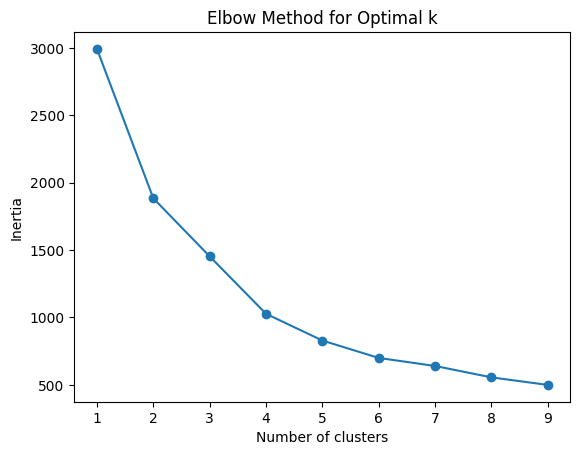

In [20]:
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [21]:
print(blood['Cluster'].value_counts())


Cluster
1    513
0    226
2      9
Name: count, dtype: int64


In [22]:
cluster_summary = blood.groupby('Cluster').mean()
print(cluster_summary)


         Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
Cluster                                                               
0                7.964602          10.123894            2530.973451   
1               10.270955           2.888889             722.222222   
2                4.666667          39.444444            9861.111111   

         Time (months)  whether he/she donated blood in March 2007  
Cluster                                                             
0            59.676991                                    0.278761  
1            22.083821                                    0.210526  
2            91.888889                                    0.777778  


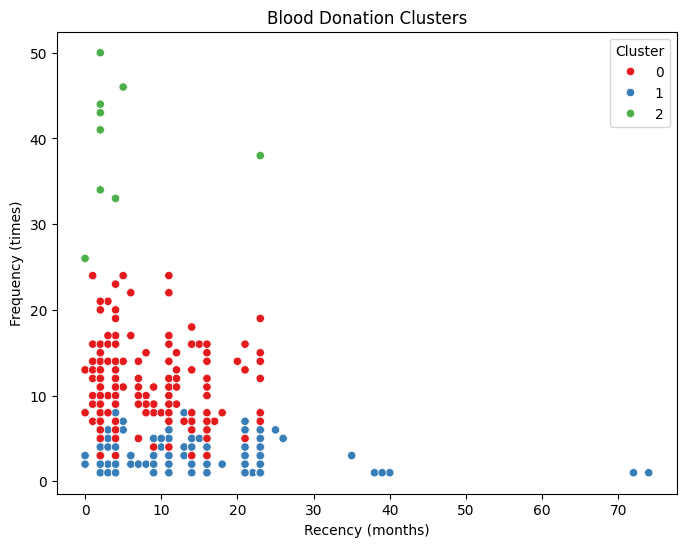

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=blood['Recency (months)'], y=blood['Frequency (times)'], hue=blood['Cluster'], palette='Set1')
plt.title('Blood Donation Clusters')
plt.xlabel('Recency (months)')
plt.ylabel('Frequency (times)')
plt.show()


In [26]:
target = blood['whether he/she donated blood in March 2007']
blood['Target'] = target


In [27]:
cluster_analysis = blood.groupby('Cluster').agg({
    'Recency (months)': 'mean',
    'Frequency (times)': 'mean',
    'Monetary (c.c. blood)': 'mean',
    'Time (months)': 'mean',
    'Target': ['mean', 'count']
})

cluster_analysis.columns = ['Recency_mean', 'Frequency_mean', 'Monetary_mean', 'Time_mean', 'Donation_rate', 'Count']
print(cluster_analysis)


         Recency_mean  Frequency_mean  Monetary_mean  Time_mean  \
Cluster                                                           
0            7.964602       10.123894    2530.973451  59.676991   
1           10.270955        2.888889     722.222222  22.083821   
2            4.666667       39.444444    9861.111111  91.888889   

         Donation_rate  Count  
Cluster                        
0             0.278761    226  
1             0.210526    513  
2             0.777778      9  


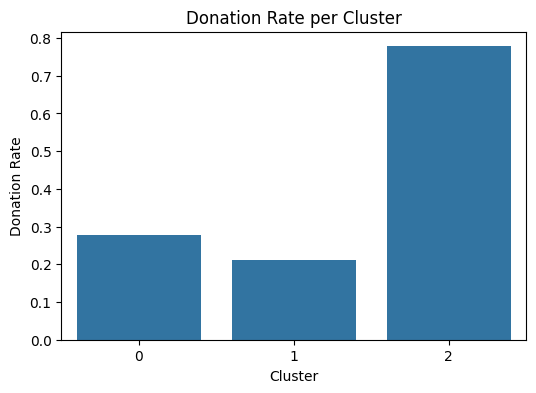

In [28]:
plt.figure(figsize=(6,4))
sns.barplot(x=cluster_analysis.index, y=cluster_analysis['Donation_rate'])
plt.ylabel('Donation Rate')
plt.title('Donation Rate per Cluster')
plt.show()